
# <span style="color:Green"> <strong>  Churn Problem Modelling with Classification <strong>  </span>

## <span style="color:green">  Business Understanding : </span>

Customer churn occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. 

## <span style="color:green">  Analytical Approach : </span>

we will create a simple customer churn prediction model using  <span style="color:green"> <strong> "churn_problem_file.csv" </strong>  </span>  dataset. We chose a decision tree to model churned customers, pandas for data crunching and matplotlib for visualizations. 

## <span style="color:green">  Data Understanding & Data requirements </span> :

In [227]:
# import libraries for data manipulation and visualization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [241]:
#  Read the data
df = pd.read_csv("churn_problem_file.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [242]:
df.shape

(7043, 21)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [244]:
#count missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We use pandas to read the dataset and preprocess it.  

<span style="color:green"> <strong> "churn_problem_file" </strong> </span> dataset has one customer per line with many columns (7043 customer & 21 features );

Each column contains a customer’s attribute:
* Customers who left within the last month : the column is called Churn
* Services that each customer has signed  for : phone, multiple lines, internet, online security, Online Backup, Device Protection, TechSupport, and streaming TV and movies
* Customer account information : how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers : gender and if they have partners and dependents


We have 2 types of features in the dataset: categorical (two or more values) and numerical.
There aren’t any rows with all missing values .

## <span style="color:green"> Data Preparation : </span>

In [245]:
# Remove columns with useless information

df = df.drop(columns=['customerID', 'tenure', 'MonthlyCharges','TotalCharges',])
#df = df.drop(columns=['customerID',])
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


To prepare the dataset for modeling churn, we need to encode categorical features to numbers so that algorithm can work with the data. 

=>This process is called onehot encoding.

In [246]:
# One Hot Encoding 
# We need to avoid the dummy variable trap
quali_encode =  pd.get_dummies(df[ ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
       "OnlineSecurity", 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod' , 'Churn']  ]  , drop_first=True    )

In [247]:
 df =df.drop(columns=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
       "OnlineSecurity", 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod' , 'Churn'])

In [248]:
df_encode = pd.concat(  [ df,quali_encode] , axis = 1)

In [249]:
df_encode

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,1,0,1,1,0,1,0,0,1,0
7039,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,1,1,0,0,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1


In [251]:
X = df_encode.iloc[:, 0:-1]
y = df_encode.iloc[:,-1 ] #Target variable

In [252]:
# Display correlation variables
pd.plotting.scatter_matrix(X , figsize=(18,20));


<function matplotlib.pyplot.show(*args, **kw)>

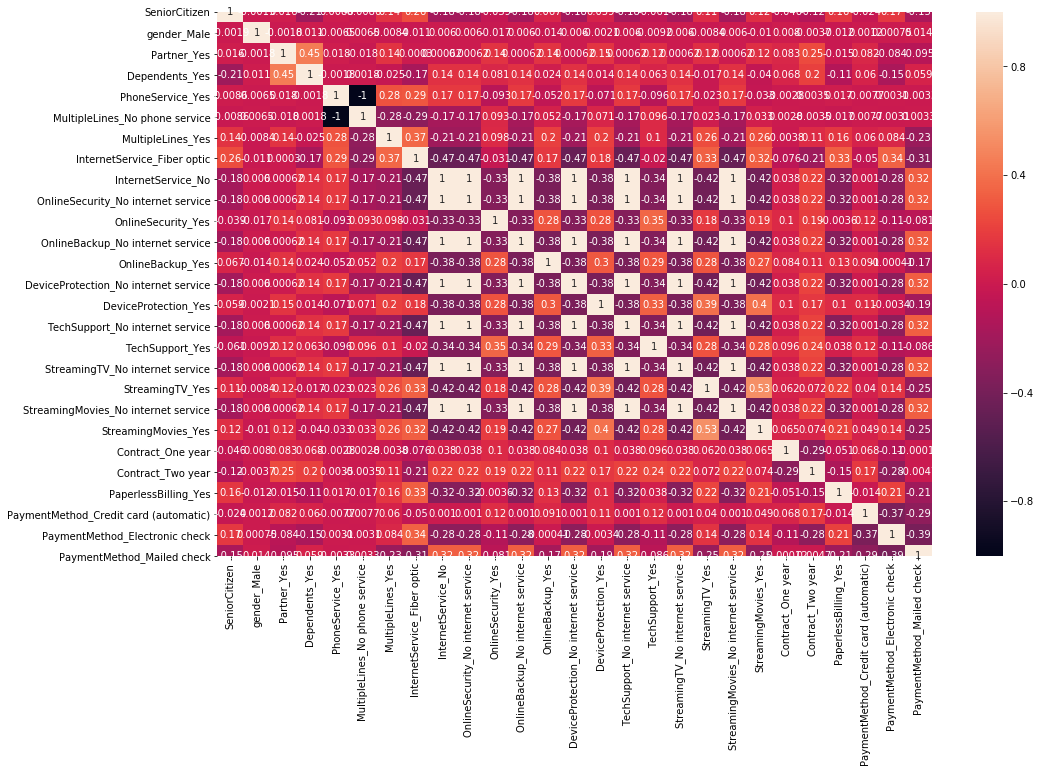

In [253]:

plt.figure(figsize=(16,10)) 
sns.heatmap(X.corr() , annot=True) 
plt.show

In [254]:
#Remove correlation variables
X.columns
X=X.drop(columns=['InternetService_No','OnlineSecurity_No internet service', 
                  'OnlineBackup_No internet service','DeviceProtection_No internet service',
                  'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service', ])

<function matplotlib.pyplot.show(*args, **kw)>

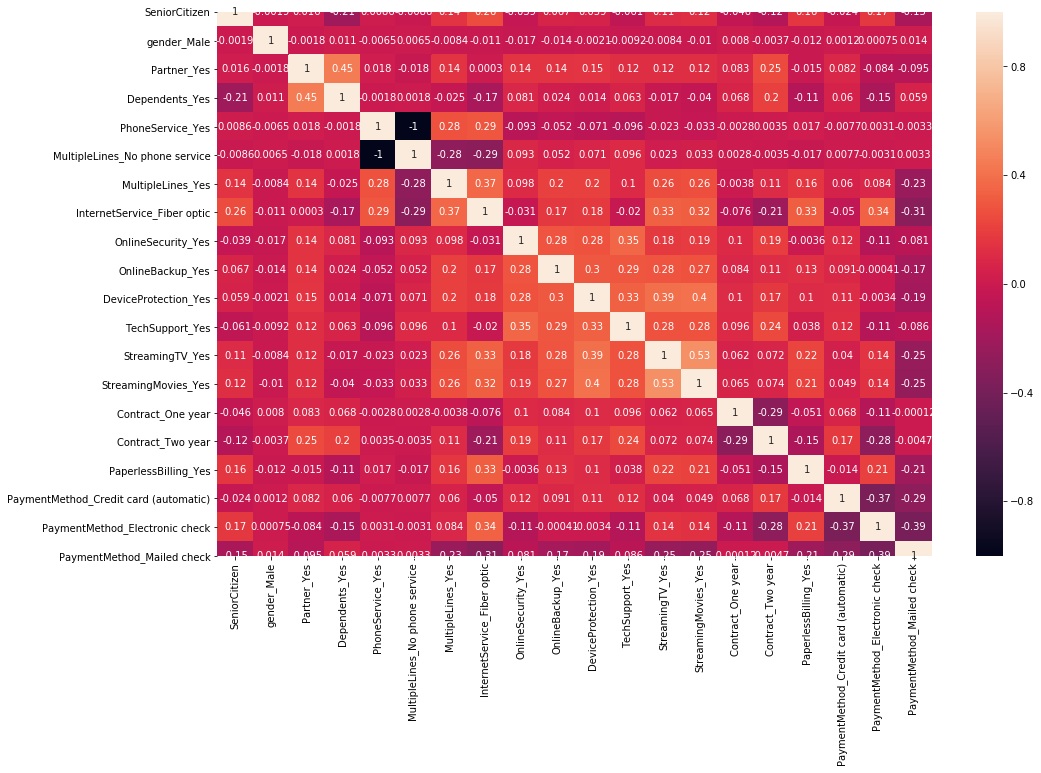

In [255]:
#check correlation
plt.figure(figsize=(16,10)) 
sns.heatmap(X.corr() , annot=True) 
plt.show

In [256]:
# Rescaling
# Remise à l'échelle
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)

In [257]:
# Random Sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size = 0.2, random_state = 1)

We split the dataset to train (80% samples) and test (20% samples).

In [258]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen                            7043 non-null int64
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_Yes                         7043 non-null uint8
DeviceProtection_Yes                     7043 non-null uint8
TechSupport_Yes                          7043 non-null uint8
StreamingTV_Yes                          7043 non-null uint8
StreamingMovies_Yes                      7043 non-null uint8
Contract_One year                      

In [259]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 20)
(1409, 20)
(5634,)
(1409,)


## <span style="color:green"> Modelling : </span>

In [260]:
#Modeling with the Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [261]:
model_rf = RandomForestClassifier(criterion="entropy", n_estimators=1000, random_state=1, n_jobs=2)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [262]:
# train 
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [263]:
# test/prediction
y_pred = model_rf.predict(X_test)

In [264]:
sum(y_pred == y_test)

1083

In [265]:
1409-1083

326

=> 1083 are correct prediction so 326 are false

## <span style="color:green">  Evaluation : </span>

In [266]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [267]:
confusion_matrix(y_test, y_pred)

array([[913, 148],
       [178, 170]], dtype=int64)

In [268]:
model_rf.score(X_test, y_test)

0.7686302342086586

In [269]:
model_rf.score(X_train, y_train)

0.9219027334043308

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1061
           1       0.53      0.49      0.51       348

    accuracy                           0.77      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.76      0.77      0.77      1409



With classification_report we calculate precision and recall with actual and predicted values.

For class 1 (churned users) model achieves 0.53 precision and 0.49 recall. Precision tells us how many churned users did our classifier predicted correctly. On the other side, recall tell us how many churned users it missed.

 <span style="color:Blue">  Elouafi Samar </span>